# Analisis Sentimen Ulasan Aplikasi MyTelkomsel di Google Palystore

## Import library

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import nltk
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
nltk.download('punkt_tab')
nltk.download('stopwords')
import csv
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Import data

In [ ]:
dataset = pd.read_csv('data.csv')
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2c8e0f86-7cee-424d-a7ee-1bbf832a8de5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tidak perlu munculkan popup utk membeli paket,...",1,1904,8.7.0,2025-05-04 01:01:07,"Makasih ya Kak Masmo untuk masukannya, berharg...",2020-09-22 11:24:48,8.7.0
1,7554336f-d8fa-4bca-955b-e7ee03e0de8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terlalu banyak fitur gak berguna di MyTelkomse...,1,2414,8.7.0,2025-05-01 00:42:26,"Hai Kak Fahri. Maaf bikin gak nyaman, apabila ...",2025-05-01 01:28:51,8.7.0
2,998ddb17-949d-49af-8125-536f632db582,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi my telkomsel memang yg paling busuk d...,1,409,8.7.0,2025-05-14 23:28:30,Hai Kak Abdillah. Mohon maaf untuk ketidaknyam...,2025-05-15 05:44:09,8.7.0
3,defe9acc-2343-49e7-add9-f19fa6d2d63f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setiap updatean terbaru selalu mengalami bug k...,1,928,8.7.0,2025-04-30 08:50:46,"Hai Kak Yusuf, Mohon maaf untuk ketidaknyamana...",2025-04-30 09:38:14,8.7.0
4,86c17637-4df0-4937-bb8c-788af9992388,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya gak bisa sat set alias gakbisa buk...,1,126,8.7.0,2025-05-13 14:35:23,"Hai Kak Joen, Mohon maaf untuk ketidaknyamanan...",2025-05-14 09:19:27,8.7.0
...,...,...,...,...,...,...,...,...,...,...,...
6123,81fbf3cb-e690-4703-b433-29203f9f2081,Wina gemoy,https://play-lh.googleusercontent.com/a/ACg8oc...,Ini gimana ko tiap mau log in pasti langsung l...,3,13,8.4.2,2024-11-26 12:39:32,Hai Kak Wina. Mohon maaf untuk ketidaknyamanan...,2024-11-27 06:47:53,8.4.2
6124,9b20a658-b248-4104-ae7b-e85842090c85,Alya Wulandari,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong ya Telkomsel, capek banget, baru buka a...",2,93,8.4.2,2024-11-26 06:58:11,"Hai Kak Alya, Mohon maaf untuk ketidaknyamanan...",2024-11-27 07:33:42,8.4.2
6125,b5645874-2fa3-4a58-a160-d29055c56a1f,Ermanda 79,https://play-lh.googleusercontent.com/a/ACg8oc...,Setiap ada misi daily chek in selalu saya ikut...,1,0,8.2.0,2025-01-01 10:32:01,"Hai, Kak Ermanda. Maaf ya. Mengenai keluhan ga...",2022-11-29 23:39:22,8.2.0
6126,97cae27b-81c0-4bce-bef4-0ff1b4e60e07,Willy Budiman,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasinya ini tambah berat, tambah lemot, in...",1,9,8.4.2,2024-12-13 07:11:15,Hai Kak Willy. Mohon maaf untuk ketidaknyamana...,2024-12-13 08:56:56,8.4.2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6128 non-null   object
 1   userName              6128 non-null   object
 2   userImage             6128 non-null   object
 3   content               6128 non-null   object
 4   score                 6128 non-null   int64 
 5   thumbsUpCount         6128 non-null   int64 
 6   reviewCreatedVersion  6128 non-null   object
 7   at                    6128 non-null   object
 8   replyContent          6128 non-null   object
 9   repliedAt             6128 non-null   object
 10  appVersion            6128 non-null   object
dtypes: int64(2), object(9)
memory usage: 526.8+ KB


## Pre processing data

Membuat fungsi untuk melakukan beberapa jenis pre-processing data

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

Inisiasi Slangwords yang kemungkinan ada di data ulasan

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "makin": "semakin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
dataset['text_clean'] = dataset['content'].astype(str).apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
dataset['text_casefoldingText'] = dataset['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
dataset['text_slangwords'] = dataset['text_casefoldingText'].apply(fix_slangwords)

# Stemming kata-kata dan menyimpannya di 'text_stemm'
dataset['text_stemm'] = dataset['text_slangwords'].apply(stemmingText)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
dataset['text_tokenizingText'] = dataset['text_stemm'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
dataset['text_stopword'] = dataset['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
dataset['text_akhir'] = dataset['text_stopword'].apply(toSentence)

In [ ]:
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_stemm,text_tokenizingText,text_stopword,text_akhir
0,2c8e0f86-7cee-424d-a7ee-1bbf832a8de5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tidak perlu munculkan popup utk membeli paket,...",1,1904,8.7.0,2025-05-04 01:01:07,"Makasih ya Kak Masmo untuk masukannya, berharg...",2020-09-22 11:24:48,8.7.0,tidak perlu munculkan popup utk membeli paket ...,tidak perlu munculkan popup utk membeli paket ...,tidak perlu munculkan popup utk membeli paket ...,tidak perlu muncul popup utk beli paket sangat...,"[tidak, perlu, muncul, popup, utk, beli, paket...","[muncul, popup, utk, beli, paket, sebal, otoma...",muncul popup utk beli paket sebal otomatis bel...
1,7554336f-d8fa-4bca-955b-e7ee03e0de8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terlalu banyak fitur gak berguna di MyTelkomse...,1,2414,8.7.0,2025-05-01 00:42:26,"Hai Kak Fahri. Maaf bikin gak nyaman, apabila ...",2025-05-01 01:28:51,8.7.0,terlalu banyak fitur gak berguna di MyTelkomse...,terlalu banyak fitur gak berguna di mytelkomse...,terlalu banyak fitur gak berguna di mytelkomse...,terlalu banyak fitur gak guna di mytelkomsel a...,"[terlalu, banyak, fitur, gak, guna, di, mytelk...","[fitur, mytelkomsel, aplikasi, berat, loading,...",fitur mytelkomsel aplikasi berat loading lamba...
2,998ddb17-949d-49af-8125-536f632db582,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi my telkomsel memang yg paling busuk d...,1,409,8.7.0,2025-05-14 23:28:30,Hai Kak Abdillah. Mohon maaf untuk ketidaknyam...,2025-05-15 05:44:09,8.7.0,aplikasi my telkomsel memang yg paling busuk d...,aplikasi my telkomsel memang yg paling busuk d...,aplikasi my telkomsel memang yg paling busuk d...,aplikasi my telkomsel memang yg paling busuk b...,"[aplikasi, my, telkomsel, memang, yg, paling, ...","[aplikasi, telkomsel, yg, busuk, banding, apli...",aplikasi telkomsel yg busuk banding aplikasi o...
3,defe9acc-2343-49e7-add9-f19fa6d2d63f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setiap updatean terbaru selalu mengalami bug k...,1,928,8.7.0,2025-04-30 08:50:46,"Hai Kak Yusuf, Mohon maaf untuk ketidaknyamana...",2025-04-30 09:38:14,8.7.0,setiap updatean terbaru selalu mengalami bug k...,setiap updatean terbaru selalu mengalami bug k...,setiap updatean terbaru selalu mengalami bug k...,tiap updatean baru selalu alami bug ketika buk...,"[tiap, updatean, baru, selalu, alami, bug, ket...","[updatean, alami, bug, buka, aplikasi, ecek, k...",updatean alami bug buka aplikasi ecek kuota ng...
4,86c17637-4df0-4937-bb8c-788af9992388,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya gak bisa sat set alias gakbisa buk...,1,126,8.7.0,2025-05-13 14:35:23,"Hai Kak Joen, Mohon maaf untuk ketidaknyamanan...",2025-05-14 09:19:27,8.7.0,Aplikasinya gak bisa sat set alias gakbisa buk...,aplikasinya gak bisa sat set alias gakbisa buk...,aplikasinya gak bisa sat set alias gakbisa buk...,aplikasi gak bisa sat set alias gakbisa buka c...,"[aplikasi, gak, bisa, sat, set, alias, gakbisa...","[aplikasi, sat, set, alias, gakbisa, buka, cep...",aplikasi sat set alias gakbisa buka cepet load...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,81fbf3cb-e690-4703-b433-29203f9f2081,Wina gemoy,https://play-lh.googleusercontent.com/a/ACg8oc...,Ini gimana ko tiap mau log in pasti langsung l...,3,13,8.4.2,2024-11-26 12:39:32,Hai Kak Wina. Mohon maaf untuk ketidaknyamanan...,2024-11-27 06:47:53,8.4.2,Ini gimana ko tiap mau log in pasti langsung l...,ini gimana ko tiap mau log in pasti langsung l...,ini gimana ko tiap mau log in pasti langsung l...,ini gimana ko tiap mau log in pasti langsung l...,"[ini, gimana, ko, tiap, mau, log, in, pasti, l...","[gimana, ko, log, langsung, log, outperasaan, ...",gimana ko log langsung log outperasaan gin b

In [ ]:
dataset.to_csv('data_fix.csv', index=False)

mari kita cek perbedaannya

In [ ]:
datatransformasi=dataset[['content', 'text_clean', 'text_casefoldingText', 'text_slangwords', 'text_stemm', 'text_tokenizingText', 'text_stopword', 'text_akhir']]

In [ ]:
datatransformasi['content'].iloc[11]

'Jaringan suka jelek gak hujan gak apa, tiap buka aplikasinya berat banget banyak bug tolong perbaiki masa kuota mahal tapi kualitas jelek malu dong. UI nya yang simpel aja biar gak berat tipa kali buka aplikasinya, kebanyakan hal yang gak berguna'

In [ ]:
datatransformasi['text_clean'].iloc[11]

'Jaringan suka jelek gak hujan gak apa tiap buka aplikasinya berat banget banyak bug tolong perbaiki masa kuota mahal tapi kualitas jelek malu dong UI nya yang simpel aja biar gak berat tipa kali buka aplikasinya kebanyakan hal yang gak berguna'

In [ ]:
datatransformasi['text_casefoldingText'].iloc[11]

'jaringan suka jelek gak hujan gak apa tiap buka aplikasinya berat banget banyak bug tolong perbaiki masa kuota mahal tapi kualitas jelek malu dong ui nya yang simpel aja biar gak berat tipa kali buka aplikasinya kebanyakan hal yang gak berguna'

In [ ]:
datatransformasi['text_slangwords'].iloc[11]

'jaringan suka jelek gak hujan gak apa tiap buka aplikasinya berat banget banyak bug tolong perbaiki masa kuota mahal tapi kualitas jelek malu dong ui nya yang simpel aja biar gak berat tipa kali buka aplikasinya kebanyakan hal yang gak berguna'

In [ ]:
datatransformasi['text_stemm'].iloc[11]

'jaring suka jelek gak hujan gak apa tiap buka aplikasi berat banget banyak bug tolong baik masa kuota mahal tapi kualitas jelek malu dong ui nya yang simpel aja biar gak berat tipa kali buka aplikasi banyak hal yang gak guna'

In [ ]:
datatransformasi['text_tokenizingText'].iloc[11]

['jaring',
 'suka',
 'jelek',
 'gak',
 'hujan',
 'gak',
 'apa',
 'tiap',
 'buka',
 'aplikasi',
 'berat',
 'banget',
 'banyak',
 'bug',
 'tolong',
 'baik',
 'masa',
 'kuota',
 'mahal',
 'tapi',
 'kualitas',
 'jelek',
 'malu',
 'dong',
 'ui',
 'nya',
 'yang',
 'simpel',
 'aja',
 'biar',
 'gak',
 'berat',
 'tipa',
 'kali',
 'buka',
 'aplikasi',
 'banyak',
 'hal',
 'yang',
 'gak',
 'guna']

In [ ]:
datatransformasi['text_stopword'].iloc[11]

['jaring',
 'suka',
 'jelek',
 'hujan',
 'buka',
 'aplikasi',
 'berat',
 'banget',
 'bug',
 'tolong',
 'kuota',
 'mahal',
 'kualitas',
 'jelek',
 'malu',
 'ui',
 'simpel',
 'aja',
 'biar',
 'berat',
 'tipa',
 'kali',
 'buka',
 'aplikasi']

In [ ]:
datatransformasi['text_akhir'].iloc[11]

'jaring suka jelek hujan buka aplikasi berat banget bug tolong kuota mahal kualitas jelek malu ui simpel aja biar berat tipa kali buka aplikasi'

# Pelabelan Data

In [ ]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = dataset['text_stopword'].apply(sentiment_analysis_lexicon_indonesia) #disini karena pengecekan per kata, kita pakai text_stopword
results = list(zip(*results))
dataset['polarity_score'] = results[0]
dataset['polarity'] = results[1]
print(dataset['polarity'].value_counts())

polarity
negative    4638
positive    1490
Name: count, dtype: int64


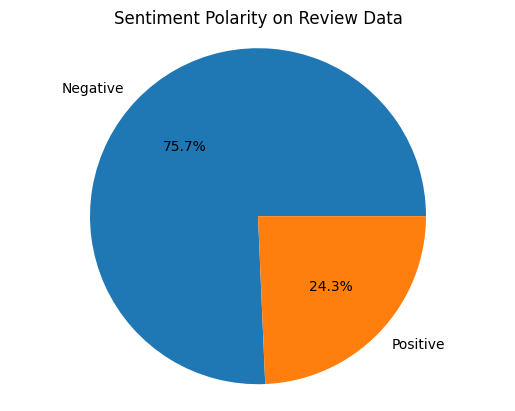

In [ ]:
import matplotlib.pyplot as plt
neg = dataset['polarity'].value_counts()['negative']
pos = dataset['polarity'].value_counts()['positive']

# Data
labels = ['Negative', 'Positive']
sizes = [neg,pos]

# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap bulat
plt.title("Sentiment Polarity on Review Data")
plt.show()


## Feature Extraction with TF-idf

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = dataset['text_akhir']
y = dataset['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=20, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Menampilkan hasil ekstraksi fitur
features_df

,aja,akses,aktif,akun,ampun,aneh,apk,apknya,aplikasi,app,...,udah,udh,ulang,uninstall,update,utama,versi,wifi,yg,youtube
0,0.151404,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.107140,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.245180,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.173500,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.247168,0.000000,...,0.000000,0.0,0.181201,0.0,0.311859,0.000000,0.0,0.0,0.283316,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.413808,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.355746,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.326224,0.216647,...,0.000000,0.0,0.000000,0.0,0.000000,0.236668,0.0,0.0,0.140226,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,0.261941,0.0,0.0,0.0,0.0,0.0,0.342077,0.0,0.000000,0.000000,...,0.325412,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
6124,0.306114,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.108310,0.000000,...,0.380288,0.0,0.000000,0.0,0.204986,0.000000,0.0,0.0,0.000000,0.0
6125,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.370563,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
6126,0.000000,0.0,0.0,0.0,0.0,0.0,0.395013,0.0,0.107023,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.368025,0.0


In [ ]:
X_train.shape

(4902, 200)

In [ ]:
X_test.shape

(1226, 200)

## Modeling with ML

In [ ]:
# Inisialisasi model SVM dengan class weight balanced
svm_model = SVC(class_weight='balanced', kernel='linear', random_state=42)

# Melatih model
svm_model.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = svm_model.predict(X_train.toarray())
y_pred_test_rf = svm_model.predict(X_test.toarray())

# Evaluasi akurasi model SVM
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_rf)
print('SVM - accuracy_test:', accuracy_test_rf)

SVM - accuracy_train: 0.8786209710322317
SVM - accuracy_test: 0.8629690048939641


In [ ]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(class_weight='balanced')

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.8790289677682579
Logistic Regression - accuracy_test: 0.8703099510603589


## Prediction new sentences

In [ ]:
# MENGGUNAKAN LOGISTIK REGRESI
# Contoh kalimat baru
new_sentences = ["Saya sangat senang dengan layanan ini",
                 "Produk ini sangat jelek sekali"]

# Ubah kalimat baru menjadi representasi numerik
X_new = tfidf.transform(new_sentences)

# Lakukan prediksi
y_pred_new = logistic_regression.predict(X_new.toarray())

# Tampilkan hasil prediksi
print("Prediksi sentimen:", y_pred_new)


Prediksi sentimen: ['positive' 'negative']


In [ ]:
# MENGGUNAKAN SVM
# Contoh kalimat baru
new_sentences = ["Saya sangat puas dengan layanan ini",
                  "Produk ini sangat buruk dan mengecewakan"]

# Ubah kalimat baru menjadi representasi numerik
X_new = tfidf.transform(new_sentences)

# Lakukan prediksi
y_pred_new = svm_model.predict(X_new.toarray())

# Tampilkan hasil prediksi
print("Prediksi sentimen:", y_pred_new)


Prediksi sentimen: ['positive' 'negative']


In [ ]:
 pip freeze > requirements.txt